# 모형진단

# 단순회귀의 모형진단
## 회귀계수 & 적합도검정
* 둘 다 모형의 적합도를 판단하는 척도
* 그러나 이것만 가지고 모형을 진단할 수 있는 것은 아니다.

## 잔차분석
잔차는 모델의 예측과 실제 값 사이의 차이.  
잔차 분석을 통해 다음을 확인할 수 있음 :
1. 모델 가정 검토: 회귀 모델의 가정 (선형성, 등분산성, 정규성 등)이 충족되는지 확인합니다.
2. 이상치 탐지: 데이터에서 비정상적인 패턴이나 이상치를 식별할 수 있습니다.
3. 모델 개선: 잔차 분석을 통해 모델을 개선하거나 새로운 모델을 선택할 수 있습니다.


<잔차분석의 주관성>
* 잔차 분석은 데이터와 모델의 상호작용을 시각적으로 분석하는 과정으로, 어느 정도의 주관성이 포함될 수 있음.
* 예를 들어, 잔차 플롯을 해석할 때는 데이터의 패턴과 모델의 적합성을 주관적으로 평가해야 함. 
* 그러나 이러한 주관성은 경험과 전문성을 바탕으로 개선될 수 있음.

# 다중회귀의 모형진단
## 여러가지 잔차
1. 일반 잔차 (Residuals)
$$e_i = y_i - \hat{y}_i$$
* $e_i$는 관측치 $y_i$ 와 예측치 $\hat{y}_i$ 의 차이입니다.

2. 외적 표준화 잔차 (Externally Standardized Residuals)
$$
\frac{e_i}{\sqrt{MSE (1 - h_{ii})}}
$$
* 여기서 MSE는 평균 제곱 오차, $h_{ii}$ 는 레버리지 값입니다.
* 주로 데이터셋의 각 관측치가 모델의 예측에서 차지하는 비율을 평가할 때 사용
* 모델이 새로운 데이터에 대한 예측 성능을 검토할 때 유용

3. 내적 표준화 잔차 (Internally Standardized Residuals):
$$ 
\frac{e_i}{\sqrt{MSE (1 - h_{ii})}} 
$$
* 특정 관측치가 모델에 미치는 영향을 분석할 때 사용
* 주로 데이터셋의 각 관측치가 모델의 적합성에 미치는 영향을 평가하는 데 유용

## 변수 1개의 영향력
### DFFITS
DFFITS (Difference in Fits) 지표는 특정 관측치를 제거했을 때의 예측 변화량을 측정.  
수식은 다음과 같음:

$$
 \text{DFFITS}i = \frac{e_i}{\sqrt{MSE \cdot h{ii}}} 
$$
여기서 $e_i$ 는 잔차, MSE는 평균 제곱 오차, $h_{ii}$는 레버리지 값.

### DFBetas
DFBetas는 특정 관측치를 제거했을 때 회귀 계수의 변화를 측정한다.  
수식은 다음과 같음:
$$
\text{DFBetas}{ij} = \frac{\hat{\beta}{j} - \hat{\beta}{j(i)}}{\text{SE}(\hat{\beta}{j(i)})} 
$$
여기서  $\hat{\beta}_{j(i)}$ 는 관측치 $i$ 를 제거했을 때의 회귀 계수, $\text{SE}$는 표준 오차.

### Cook’s Distance
Cook’s Distance는 특정 관측치가 전체 모델 적합도에 미치는 영향을 측정.  
수식은 다음과 같음:

$$
D_i = \frac{e_i^2}{p \cdot MSE} \cdot \frac{h_{ii}}{(1 - h_{ii})^2} 
$$

여기서 $e_i$는 잔차, $p$는 모델의 매개변수 수, $MSE$는 평균 제곱 오차, $h_{ii}$는 레버리지 값.

## 그 외의 진단법
### Leverage
* 레버리지 값 $h_{ii}$ 는 특정 관측치가 예측 값에 미치는 영향을 측정.   
* 레버리지 값의 범위는 0에서 1까지이며, 값이 클수록 관측치가 모델에 미치는 영향이 큼.  

### Bonferroni Correction
* 보정 방법 중 하나
* 다중 비교에서 발견된 유의미한 결과의 신뢰도를 높이기 위해 각 비교에 대해 유의수준을 조정. 
* 보정된 유의수준은  $\alpha / k$로 계산됨. 
* 여기서 $\alpha$ 는 원래의 유의수준, $k$는 비교의 수.

### Added Variable Plot
* 변수 간의 관계를 시각화하여 특정 변수의 추가가 종속 변수에 미치는 영향을 분석. 
* 이를 통해 특정 변수의 효과를 평가하고, 모델의 설명력을 향상시킬 수 있음.

### C-R Plot
* C-R (Component + Residual) 플롯은 모델의 각 예측 변수와 잔차 간의 관계를 시각화.
* 이를 통해 변수와 잔차 간의 패턴을 확인하고, 모델의 적합성을 검토할 수 있음.

# 예시코드 1
* 단순회귀의 모형진단을 코드로 알아보자.
* 회귀계수, ANOVA, 잔차분석 사용

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from statsmodels.stats.stattools import durbin_watson

## 1. 단순 회귀 모형

In [27]:
# 데이터 로드
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 단순 회귀: 'bmi' (Body Mass Index)로 'target' (Diabetes Progression)을 예측
# 여기서는 smf.ols를 사용하여 모델을 적합시킴
model = smf.ols(formula='target ~ bmi', data=df).fit()
print("Simple Linear Regression Model Summary:")
print(model.summary())

Simple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.47e-42
Time:                        14:41:26   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

## 2. 회귀계수와 ANOVA

In [28]:
print("R-squared:", model.rsquared)

# ANOVA 검정 (적합도 검정)
anova_results = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:")
print(anova_results)

R-squared: 0.3439237602253803
ANOVA Results:
                sum_sq     df           F        PR(>F)
bmi       9.014273e+05    1.0  230.653764  3.466006e-42
Residual  1.719582e+06  440.0         NaN           NaN


## 3. 잔차분석

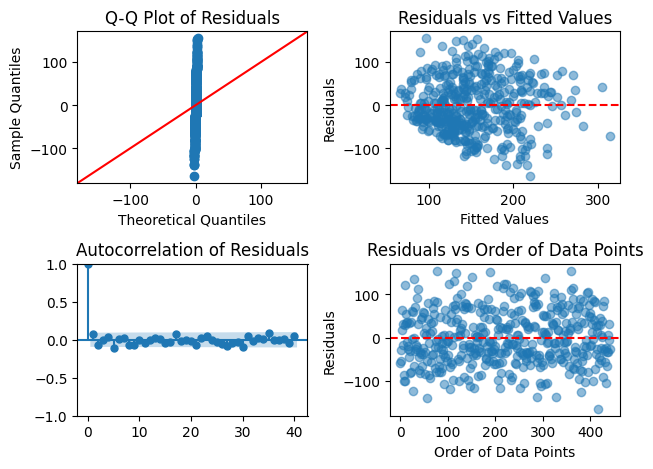

In [38]:
# 잔차를 통한 정규성, 등분산성, 독립성, 선형성 점검
residuals = model.resid
fitted_values = model.fittedvalues

# 잔차의 정규성 점검 - Q-Q Plot
plt.subplot(2, 2, 1)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

# 잔차의 등분산성 점검 - Residuals vs Fitted Values
plt.subplot(2, 2, 2)
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 잔차의 독립성 점검 - Autocorrelation Plot
plt.subplot(2, 2, 3)
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('Autocorrelation of Residuals')

# 잔차의 선형성 점검 - Residuals vs Order of Data Points
plt.subplot(2, 2, 4)
plt.plot(residuals, marker='o', linestyle='', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Order of Data Points')
plt.xlabel('Order of Data Points')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# 예시코드 2
* 다중회귀의 잔차분석
* 위와 같은 데이터를 사용
* 여러가지 잔차와 플롯을 사용

## 1. 다중 회귀 모형

In [40]:
# 여러 독립 변수 사용
X_multi = df[['bmi', 'age', 'sex', 's1']]
X_multi = sm.add_constant(X_multi)
y_multi = df['target']

model_multi = sm.OLS(y_multi, X_multi).fit()

## 2. 잔차 분석

In [41]:
# 표준화 잔차 및 레버리지 계산
influence = model_multi.get_influence()
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external
leverage = influence.hat_matrix_diag

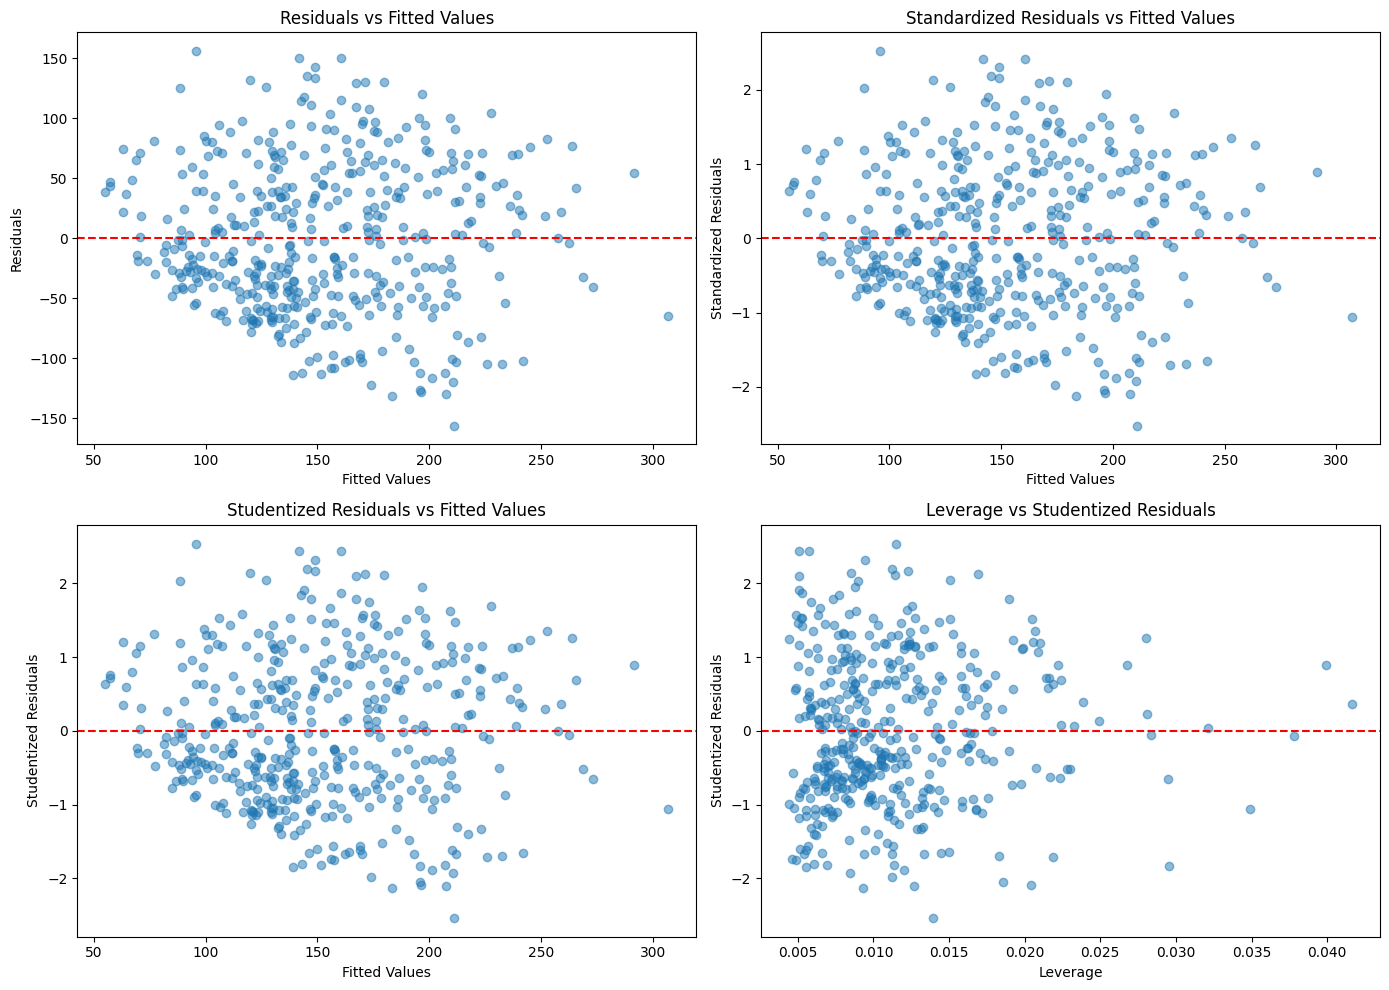

In [42]:
# 일반적인 잔차 vs. 적합값
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(model_multi.fittedvalues, model_multi.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 내적 표준화 잔차 vs. 적합값
plt.subplot(2, 2, 2)
plt.scatter(model_multi.fittedvalues, standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Standardized Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

# 외적 표준화 잔차 vs. 적합값
plt.subplot(2, 2, 3)
plt.scatter(model_multi.fittedvalues, studentized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Studentized Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')

# 레버리지 vs. Studentized Residuals
plt.subplot(2, 2, 4)
plt.scatter(leverage, studentized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Leverage vs Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()

In [53]:
# 6. dffits, dfbetas, Bonferroni Correction
# dffits
def compute_dffits(model):
    influence = model.get_influence()
    dffits_values = influence.dffits[0]
    return dffits_values

dffits_values = compute_dffits(model_multi)

# dfbetas
def compute_dfbetas(model):
    influence = model.get_influence()
    dfbetas_values = influence.dfbetas
    return dfbetas_values

dfbetas_values = compute_dfbetas(model_multi)

# Cook's Distance
cooks_d = influence.cooks_distance[0]

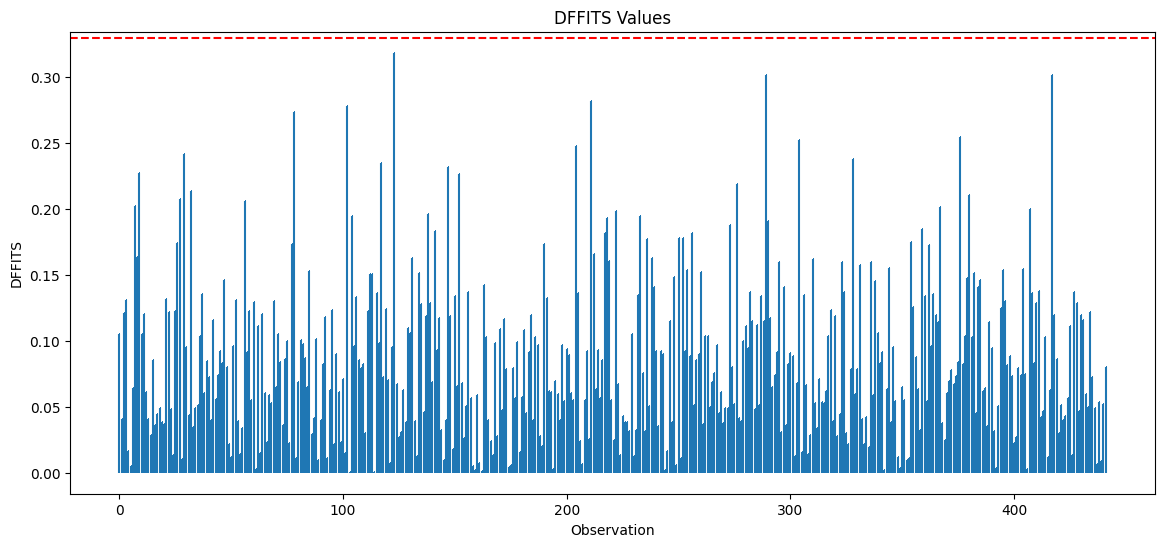

In [54]:
# dffits 시각화
plt.figure(figsize=(14, 6))
plt.stem(np.arange(len(dffits_values)), np.abs(dffits_values), markerfmt=",", basefmt=" ")
plt.axhline(2 * np.sqrt((len(df.columns) + 1) / len(df)), color='red', linestyle='--')
plt.title('DFFITS Values')
plt.xlabel('Observation')
plt.ylabel('DFFITS')
plt.show()

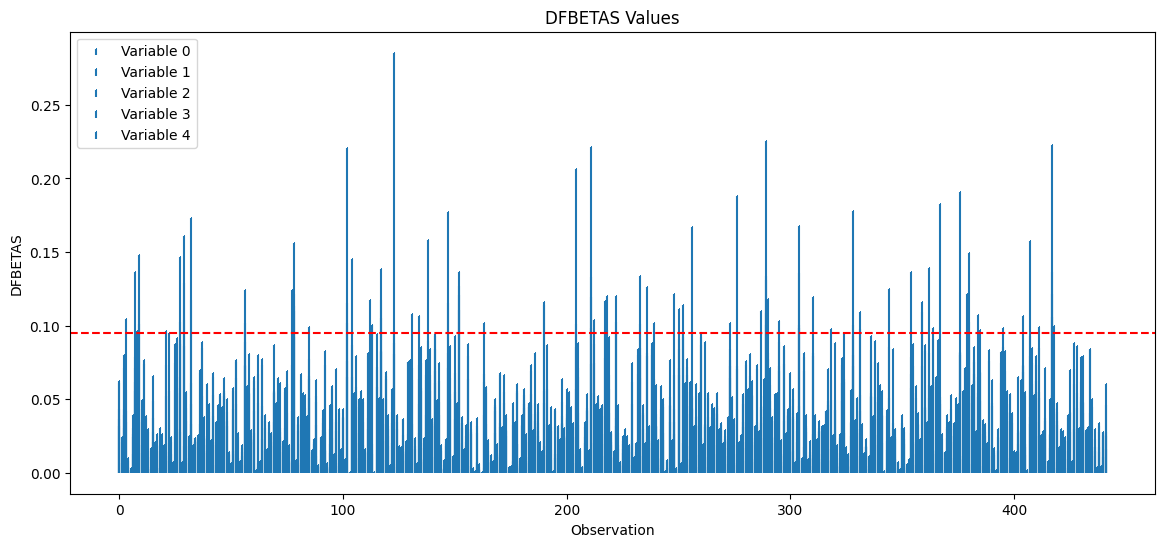

In [55]:
# dfbetas 시각화
plt.figure(figsize=(14, 6))
for i in range(dfbetas_values.shape[1]):
    plt.stem(np.arange(len(dfbetas_values)), np.abs(dfbetas_values[:, i]), markerfmt=",", basefmt=" ", label=f'Variable {i}')
plt.axhline(2 / np.sqrt(len(df)), color='red', linestyle='--')
plt.title('DFBETAS Values')
plt.xlabel('Observation')
plt.ylabel('DFBETAS')
plt.legend()
plt.show()

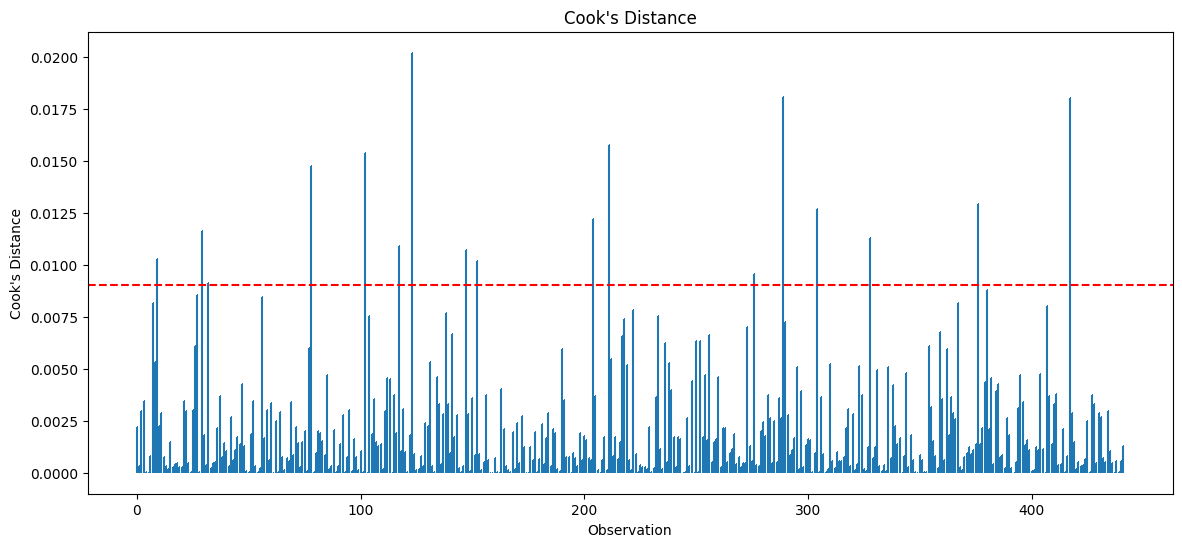

In [56]:
# Cook's Distance 시각화
plt.figure(figsize=(14, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(4 / len(df), color='red', linestyle='--')
plt.title("Cook's Distance")
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.show()

In [47]:
# Bonferroni correction
alpha = 0.05
n = len(df)
p = len(model_multi.params)
bonferroni_threshold = alpha / (n * p)

print("Bonferroni Correction Threshold:", bonferroni_threshold)

Bonferroni Correction Threshold: 2.262443438914027e-05


## 3. 여러가지 플롯

In [49]:
def added_variable_plot(model, variable_name):
    y_resid = model.resid
    X = model.model.exog
    variable_idx = list(model.model.exog_names).index(variable_name)
    X_other = np.delete(X, variable_idx, axis=1)
    
    other_model = sm.OLS(X[:, variable_idx], X_other).fit()
    X_resid = other_model.resid
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_resid, y_resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Added Variable Plot for {variable_name}')
    plt.xlabel('X Residuals')
    plt.ylabel('Y Residuals')
    plt.show()

def component_residual_plot(model, variable_name):
    X_variable = model.model.exog[:, model.model.exog_names.index(variable_name)]
    plt.figure(figsize=(8, 6))
    plt.scatter(X_variable, model.resid + model.params[variable_name] * X_variable, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Component-Residual Plot for {variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Component + Residual')
    plt.show()

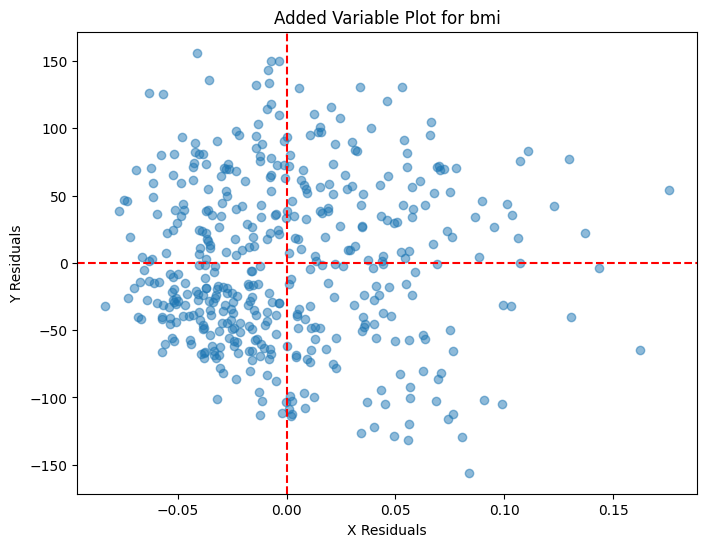

In [50]:
# Added Variable Plot for 'bmi'
added_variable_plot(model_multi, 'bmi')

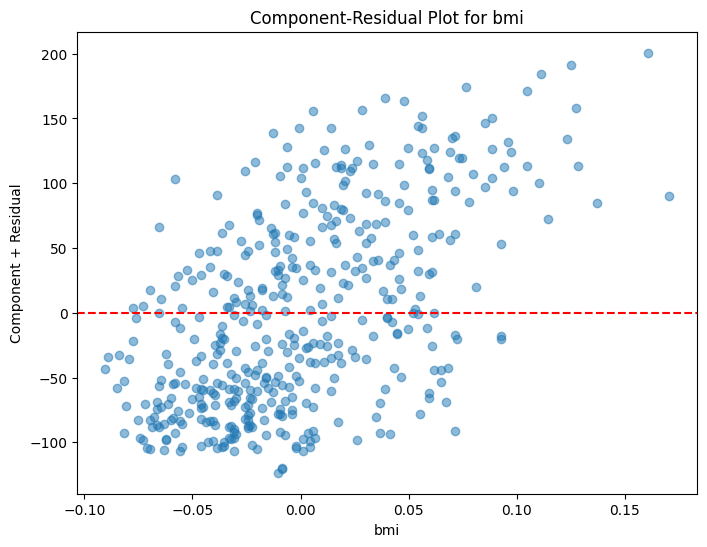

In [51]:
# Component-Residual Plot for 'bmi'
component_residual_plot(model_multi, 'bmi')